In [26]:
import argparse
import sys
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scikitplot as skplt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy import stats
from yellowbrick.model_selection import RFECV
from scipy.stats import pearsonr
#df = pd.read_csv("Newer_new/final_withTemplates_0.8.csv", sep=',')
df = pd.read_csv("Newer_new/Statistics/Statistic_d5.csv", sep=',')
dfT = pd.read_csv("Newer_new/Statistics/final_withTemplates_JZ2.csv", sep=',')
df= df.drop(['tmalign','good'],axis = 1)
df = pd.merge(df, dfT, on=['modelID', 'Nmodel'])

df["good"] = (df['tmalign']>0.5)
dff= df.drop(["Unnamed: 0"],axis = 1)
print(df)
dff.to_csv("Newer_new/Statistics/Statistic_d6.csv", sep=',')


#df['tmalign'] = df['tmalign2']

#df= df.drop(['tmalign2'],axis = 1)

df = df.dropna()
df = df.drop_duplicates()

# Labels are the values we want to predict
labels = np.array(df['tmalign'])
labelsC=  np.array(df['class'])
# Remove the labels from the features
# axis 1 refers to the columns
#df= df.drop('modelID', axis = 1)
cor=df.corr(method = "pearson")
cor.to_csv('correlation.csv')



dft= df.drop(['tmalign','class','Nmodel',"Unnamed: 0","seqlength","FE","A","G","K","C","E","D","F","I","H","M","L","N","Q","S","R","T","W","V","Y","good","RMSD","Ncont"],axis = 1)

#dft= df.drop(['tmalign','class','Nmodel',"proq4","Neff","DIS","FC","FE","FH","A","C","E","D","F","I","H","M","L","N","Q","P","S","R","T","W","V","Y"],axis = 1)
#dft= df.drop(['Nmodel',"tmalign","class","Neff","DIS","FE","FH","A","C","E","D","G","F","I","H","K","M","L","N","Q","P","S","R","T","W","V","Y"],axis = 1)

df = np.array(df)
#dft = np.array(dft)

pd.to_numeric(dft.pcons)


      Unnamed: 0  modelID       DIS    Len        FC        FE        FH  \
0              0  1064003  0.409797   31.0  0.290323  0.000000  0.709677   
1              1  1064003  0.409797   31.0  0.290323  0.000000  0.709677   
2              2  1064003  0.409797   31.0  0.290323  0.000000  0.709677   
3              3  1064003  0.409797   31.0  0.290323  0.000000  0.709677   
4              4  1064003  0.409797   31.0  0.290323  0.000000  0.709677   
5              5   966001  0.485317   23.0  0.260870  0.043478  0.695652   
6              6   966001  0.485317   23.0  0.260870  0.043478  0.695652   
7              7   966001  0.485317   23.0  0.260870  0.043478  0.695652   
8              8   966001  0.485317   23.0  0.260870  0.043478  0.695652   
9              9   966001  0.485317   23.0  0.260870  0.043478  0.695652   
10            10   549001  0.701490   35.0  0.371429  0.000000  0.628571   
11            11   549001  0.701490   35.0  0.371429  0.000000  0.628571   
12          

0       0.976
1       0.975
2       0.969
3       0.980
4       0.961
5       0.664
6       0.649
7       0.775
8       0.761
9       0.776
10      0.862
11      0.872
12      0.768
13      0.878
14      0.794
15      0.579
16      0.579
17      0.583
18      0.583
19      0.487
20      0.487
21      0.591
22      0.591
23      0.493
24      0.493
25      0.974
26      0.980
27      0.969
28      0.981
29      0.981
        ...  
1115    0.974
1116    0.978
1117    0.973
1118    0.963
1119    0.958
1120    0.715
1121    0.715
1122    0.709
1123    0.710
1124    0.700
1125    0.956
1126    0.937
1127    0.958
1128    0.958
1129    0.955
1130    0.981
1131    0.977
1132    0.977
1133    0.977
1134    0.979
1135    0.602
1136    0.605
1137    0.592
1138    0.558
1139    0.597
1140    0.406
1141    0.452
1142    0.463
1143    0.442
1144    0.413
Name: pcons, Length: 1145, dtype: float64

In [2]:
print(dft)
dft.to_csv("training_set.csv")

      modelID       DIS    Len        FC        FH         P  proq4  pcons  \
0     1064003  0.409797   31.0  0.290323  0.709677  0.000000  0.445  0.976   
1     1064003  0.409797   31.0  0.290323  0.709677  0.000000  0.445  0.975   
2     1064003  0.409797   31.0  0.290323  0.709677  0.000000  0.424  0.969   
3     1064003  0.409797   31.0  0.290323  0.709677  0.000000  0.443  0.980   
4     1064003  0.409797   31.0  0.290323  0.709677  0.000000  0.447  0.961   
5      966001  0.485317   23.0  0.260870  0.695652  0.000000  0.174  0.664   
6      966001  0.485317   23.0  0.260870  0.695652  0.000000  0.192  0.649   
7      966001  0.485317   23.0  0.260870  0.695652  0.000000  0.154  0.775   
8      966001  0.485317   23.0  0.260870  0.695652  0.000000  0.150  0.761   
9      966001  0.485317   23.0  0.260870  0.695652  0.000000  0.150  0.776   
10     549001  0.701490   35.0  0.371429  0.628571  0.028571  0.203  0.862   
11     549001  0.701490   35.0  0.371429  0.628571  0.028571  0.

In [3]:
kf = KFold(n_splits=223, shuffle=False)
kf.get_n_splits(dft)

223

In [4]:
#train_inds, test_inds = next(GroupShuffleSplit(test_size=.33, n_splits=2, random_state = 7).split(dft, groups=dfo['modelID']))

gs = GroupShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#train_inds, test_inds = next(gs.split(dft, labels, groups=dft['modelID']))
groups=dft['modelID']
print(dft.dtypes)
#print(groups.shape)
#print(groups)
#print(train_inds)
#test_inds=test_inds[4::5]
#print(train['pcons'])
#pd.to_numeric(train.pcons)
#pd.to_numeric(test.pcons)
#print(train.dtypes)

modelID        int64
DIS          float64
Len          float64
FC           float64
FH           float64
P            float64
proq4        float64
pcons        float64
qmean        float64
dan          float64
Neff         float64
contact_L    float64
dtype: object


In [5]:
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
print(kf)

#rf.fit(train, labels[train_inds]);
#predictions = rf.predict(test)
#Pred_TM =[predictions, labels[test_inds]]


n_fold = 1
for train_inds, test_inds in gs.split(dft, labels, groups=dft['modelID']):
    dft2= dft.drop('modelID',axis = 1)
    train, test = dft2.iloc[train_inds], dft2.iloc[test_inds]
   
    rf.fit(train, labels[train_inds]);
    predictions = rf.predict(test)
    errors = abs(predictions - labels[test_inds])
    #print('Mean Absolute Error:', round(np.mean(errors), 5), 'TM point.')
    mape = 100 * (errors / labels[test_inds])
    accuracy = 100 - np.mean(mape)
    #MAE = mean_squared_error(labels[test_index], predictions)
    #print('MAE',MAE,)
    #print(round(accuracy, 2))  #print('Accuracy:', round(accuracy, 2), '%.')
    
    Pred_TM =[predictions, labels[test_inds]]
    
    corr, _ = pearsonr(predictions, labels[test_inds])
    print( corr)
    
    #for v in zip(*Pred_TM):
    #    print(*v)
    n_fold = 1

KFold(n_splits=223, random_state=None, shuffle=False)
0.742325585861745
0.5855727753943443
0.5491683927446989
0.7772802755477982
0.5842301885536173


In [6]:
for train_inds, test_inds in gs.split(dft, labels, groups=dft['modelID']):
    dft2= dft.drop('modelID',axis = 1)
    train, test = dft2.iloc[train_inds], dft2.iloc[test_inds]
    regr = linear_model.LinearRegression()
    regr.fit(train, labels[train_inds])
    Pred_TM_lr = regr.predict(test)
    corr, _ = pearsonr(Pred_TM_lr, labels[test_inds])
    print( corr)

0.7135193902735417
0.6114979189046016
0.4955072439174766
0.6798831267801404
0.6249792972801761


In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from pandas import DataFrame

PPV =[]
for train_inds, test_inds in gs.split(dft, labelsC, groups=dft['modelID']):
    dft2= dft.drop('modelID',axis = 1)
    train, test = dft2.iloc[train_inds], dft2.iloc[test_inds]
    RF = RandomForestClassifier(n_estimators=200, random_state=42)
    RF.fit(train, labelsC[train_inds])
    Pred_TM_RF = RF.predict(test)

    #print(classification_report(Pred_TM_RF, labelsC[test_inds]))

    threshold = 0.5

    predicted_proba = RF.predict_proba(test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    
    accuracy1 = accuracy_score(labelsC[test_inds], Pred_TM_RF)
    accuracy2= accuracy_score(labelsC[test_inds], predicted)
    #PPV1= precision_score(labelsC[test_inds], Pred_TM_RF, average='macro')
    PPV2= precision_score(predicted,labelsC[test_inds], average='macro')
    #print(dft['modelID'][test_inds])
    #print(Pred_TM_RF)
    #print(labelsC[test_inds])
    PPV.append(PPV2)
    train_data = [Pred_TM_RF, labelsC[test_inds], predicted_proba[:,1]]
    df6 = DataFrame(train_data).transpose()
    df6.columns =['Prediction','Label','probability']
    df6.to_csv("Training_result.csv",mode='a') 

    
    #PPV = np.array(PPV)

    print(np.average(PPV))    
    #print(PPV2)

    
    #or row in zip(predicted, Pred_TM_RF, predicted_proba[:,1]) :
    


0.75
0.6691869229319767
0.6468288406400972
0.6638211732110726
0.6791427422333897


In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from pandas import DataFrame

kf = KFold(n_splits=5, shuffle=False)
kf.get_n_splits(dft)

gs = GroupShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#train_inds, test_inds = next(gs.split(dft, labels, groups=dft['modelID']))
groups=dft['modelID']



PPV =[]
for train_inds, test_inds in gs.split(dft, labelsC, groups=dft['modelID']):
    dft8= dft.drop('modelID',axis = 1)
    train, test = dft8.iloc[train_inds], dft8.iloc[test_inds]
    RF3 = RandomForestClassifier(n_estimators=50, max_features=0.4, min_samples_leaf=35, random_state=24)
    RF3.fit(train, labelsC[train_inds])
    Pred_TM_RF3 = RF3.predict(test)

    print(classification_report(Pred_TM_RF3, labelsC[test_inds]))

    threshold = 0.5

    predicted_proba = RF3.predict_proba(test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    
    accuracy1 = accuracy_score(labelsC[test_inds], Pred_TM_RF3)
    accuracy2= accuracy_score(labelsC[test_inds], predicted)
    #PPV1= precision_score(labelsC[test_inds], Pred_TM_RF, average='macro')
    PPV2= precision_score(predicted,labelsC[test_inds], average='macro')
    #print(dft['modelID'][test_inds])
    #print(Pred_TM_RF)
    #print(labelsC[test_inds])
    PPV.append(PPV2)
    train_data = [test_inds, Pred_TM_RF3, labelsC[test_inds], predicted_proba[:,1]]
    df9 = DataFrame(train_data).transpose()
    df9.columns =["test_ids",'Prediction','Label','probability']
    df9.to_csv("Training_result2.csv",mode='a') 
    print(PPV2) 

    

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       140
         1.0       0.73      0.65      0.69        85

    accuracy                           0.78       225
   macro avg       0.77      0.75      0.76       225
weighted avg       0.77      0.78      0.77       225

0.7666666666666666
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       173
         1.0       0.46      0.45      0.46        62

    accuracy                           0.71       235
   macro avg       0.63      0.63      0.63       235
weighted avg       0.71      0.71      0.71       235

0.6318070472960241
              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68       130
         1.0       0.57      0.50      0.53       100

    accuracy                           0.62       230
   macro avg       0.61      0.60      0.60       230
weighted avg       0.61      0.62   

In [9]:
importances = RF3.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_list = ["DIS","Len","FC","FH","P","proq4","pcons","qmean","dan","Neff","contact_L"] #names of features.
ff = np.array(feature_list)

# Print the feature ranking
print("Feature ranking:")

for f in range(dft2.shape[1]):
        print("%d. feature: %s (%f)" % (f + 1, ff[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature: pcons (0.228900)
2. feature: proq4 (0.148528)
3. feature: contact_L (0.127323)
4. feature: qmean (0.103354)
5. feature: FH (0.096171)
6. feature: Neff (0.083085)
7. feature: FC (0.059764)
8. feature: P (0.049318)
9. feature: Len (0.045567)
10. feature: dan (0.033577)
11. feature: DIS (0.024414)


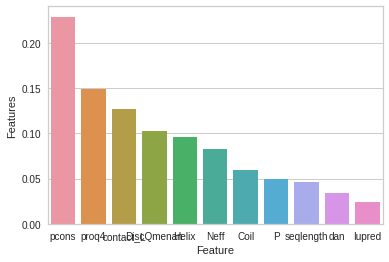

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dff =  pd.read_csv("features.csv")


ax = sns.barplot(x="Feature", y="Importance", data=dff)


ax.set_ylabel("Features")
fig = ax.get_figure()

plt.show() 

In [11]:
dfnT = pd.read_csv("Newer_new/final_noTemplates.csv", sep=' ')
dfT = pd.read_csv("Newer_new/final_withTemplates.csv", sep=' ')

SS = pd.read_csv("Newer_new/SS_fractions_template5", sep=',')
total = dfT.append([dfnT])
print(SS)

      modelID  Nmodel    C  seqlength        FC
0       15006       1   46         76  0.605263
1       15006       2   46         76  0.605263
2       15006       3   46         76  0.605263
3       15006       4   46         76  0.605263
4       15006       5   46         76  0.605263
5      138010       1   59         77  0.766234
6      138010       2   59         77  0.766234
7      138010       3   59         77  0.766234
8      138010       4   59         77  0.766234
9      138010       5   59         77  0.766234
10     797001       1   52         77  0.675325
11     797001       2   52         77  0.675325
12     797001       3   52         77  0.675325
13     797001       4   52         77  0.675325
14     797001       5   52         77  0.675325
15     931002       1   28         34  0.823529
16     931002       2   28         34  0.823529
17     931002       3   28         34  0.823529
18     931002       4   28         34  0.823529
19     931002       5   28         34  0

/home/claudio/.local/lib/python3.5/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [12]:
T1 = pd.read_csv("Newer_new/Template_new.csv", sep=',')
T2 = pd.read_csv("Newer_new/ID_order.txt", sep=',')
#dfT = pd.concat([T1, T2], axis=1)
data3 = T1.merge(T2, how='outer')

#data3['Diff'] = np.where( data3['PDB1'] == data3['PDB2'] , '1', '0')

data3.to_csv('Outer')
###print(data3)

In [19]:
######Prediction######
data = pd.read_csv("Newer_new/Predict_set.csv", sep=',')
SS = pd.read_csv("Newer_new/data_SS_TOT.csv", sep=',')
dfAA = pd.read_csv("Newer_new/Data_all_features.csv", sep=',')
data_prova= pd.read_csv("training_set.csv", index_col=False, sep=',')
#dataA = data.merge(T2, how='outer')
df8 = pd.read_csv("Newer_new/Statistics/ID_numcontacts_8.csv")
dfn = pd.read_csv("Newer_new/Statistics/Neff.csv")


data2 = data.merge(SS, how='outer')
data28 = data2.merge(df8, how='outer').dropna()
data28n = data28.merge(dfn, how='outer').dropna()
data28n["contact_L"] = data28n['Ncont']/data28n['seqlen']
data28nA = data28n.merge(dfAA, how='outer').dropna()
#print(data28nA)
#data4.to_csv('Data2')
#data28nA = data28nA.drop(['modelID','Nmodel'],axis = 1)
data28nA.to_csv('Prediction_set.csv')

data4 = data28nA.drop(["modelID","Nmodel","FE","A","G","K","C","E","D","F","I","H","M","L","N","Q","S","R","T","W","V","Y","Ncont"],axis = 1)
print(data4)


#print(list(data_prova2.shape))


Pred = RF3.predict(data4)
list1 = Pred.tolist()
print(list1)

#good = []
#good.append([index for index,ele in enumerate(list1) if ele==1])
#print([data4.ix[good]])

      pcons  proq4  qmeanDisCo  seqlen    dan        FC     Neff  contact_L  \
0     0.996  0.496       0.518    77.0  0.609  0.571429  7.74456   0.454545   
1     0.996  0.487       0.523    77.0  0.615  0.571429  7.74456   0.454545   
2     0.995  0.497       0.515    77.0  0.618  0.571429  7.74456   0.454545   
3     0.995  0.496       0.518    77.0  0.646  0.571429  7.74456   0.454545   
4     0.993  0.482       0.522    77.0  0.620  0.571429  7.74456   0.454545   
5     0.995  0.509       0.660    41.0  0.688  0.341463  6.86236   0.975610   
6     0.994  0.511       0.727    41.0  0.704  0.341463  6.86236   0.975610   
7     0.994  0.498       0.658    41.0  0.707  0.341463  6.86236   0.975610   
8     0.994  0.483       0.750    41.0  0.705  0.341463  6.86236   0.975610   
9     0.987  0.493       0.730    41.0  0.698  0.341463  6.86236   0.975610   
10    0.994  0.369       0.371   131.0  0.560  0.503817  4.34869   0.274809   
11    0.994  0.383       0.399   131.0  0.526  0.503